/tmp/ipykernel_432218/3029314978.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3029314978.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3029314978.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3029314978.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


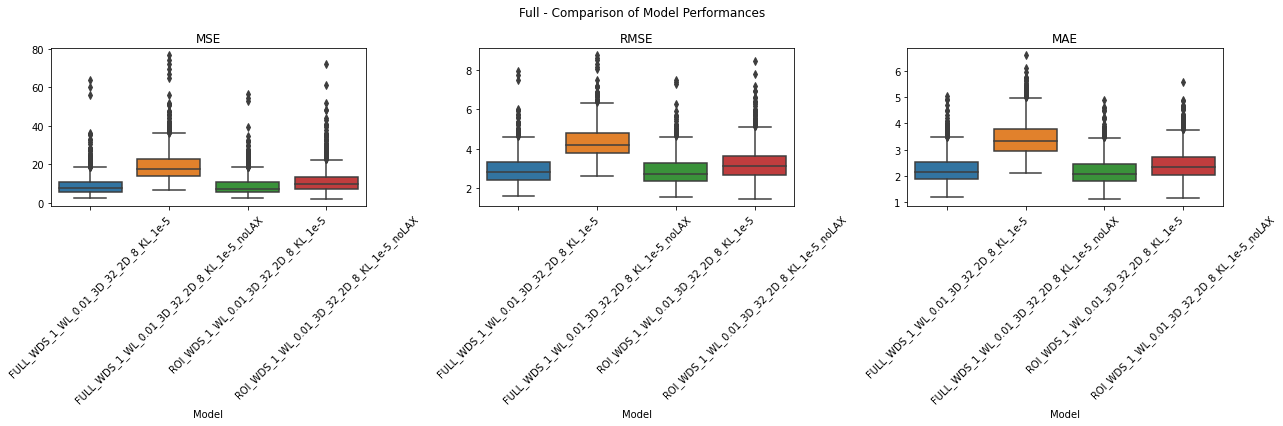

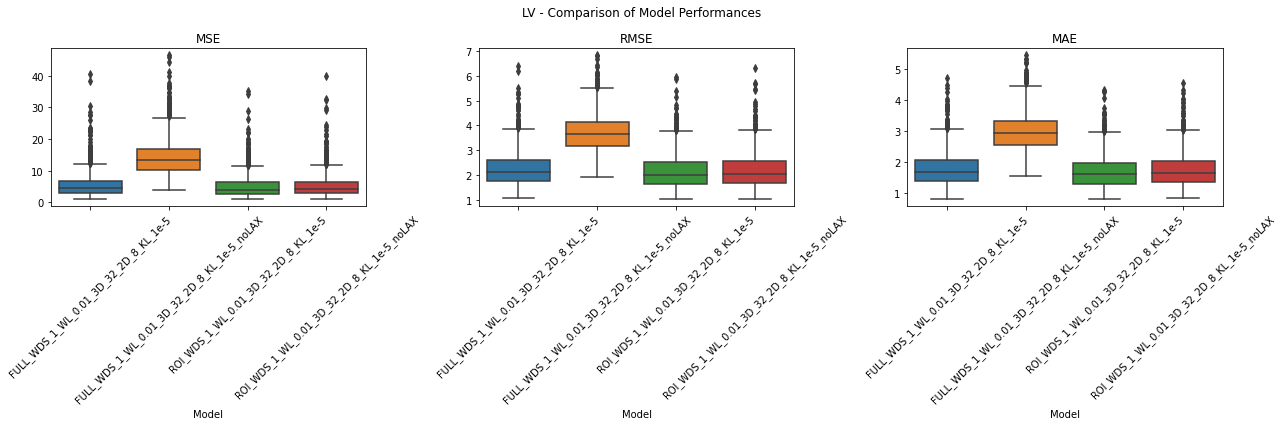

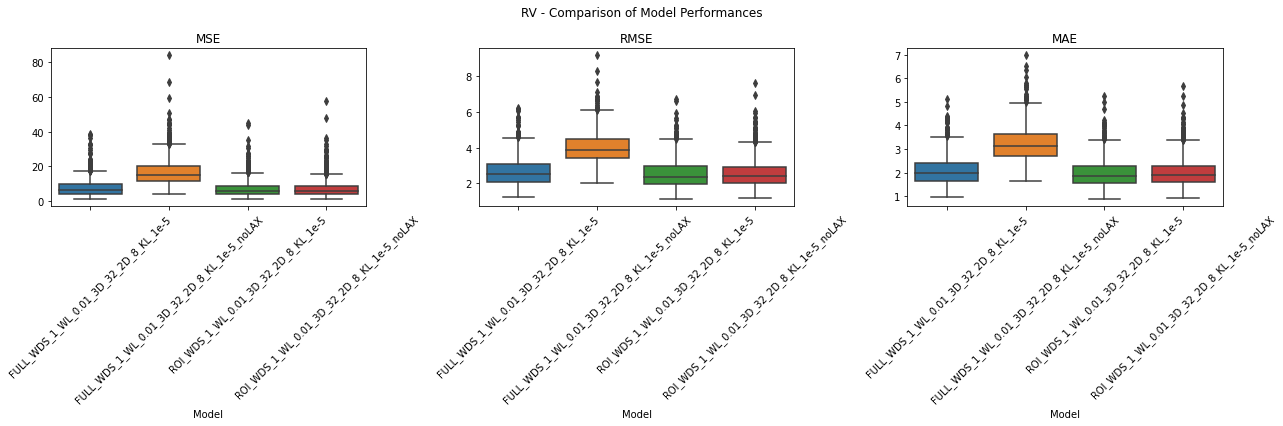

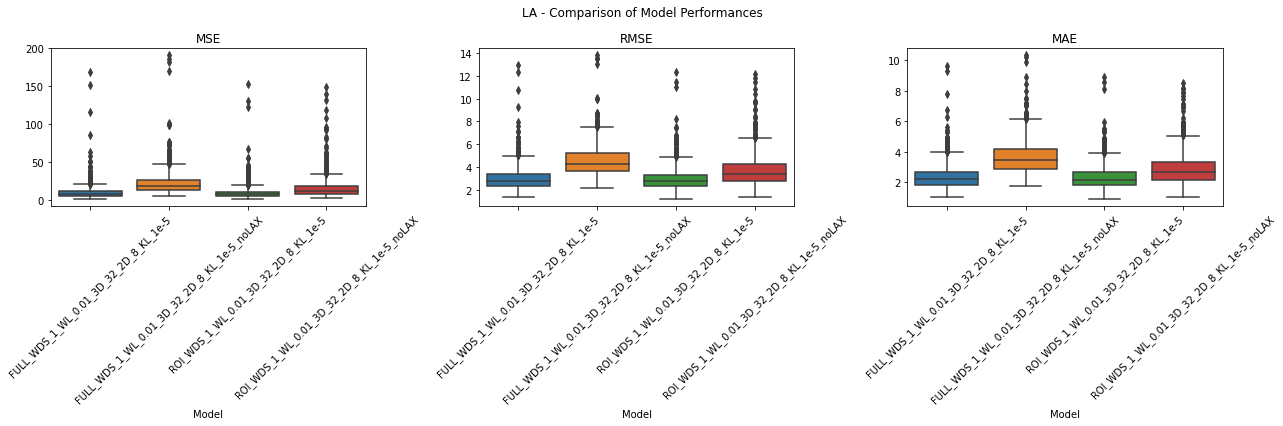

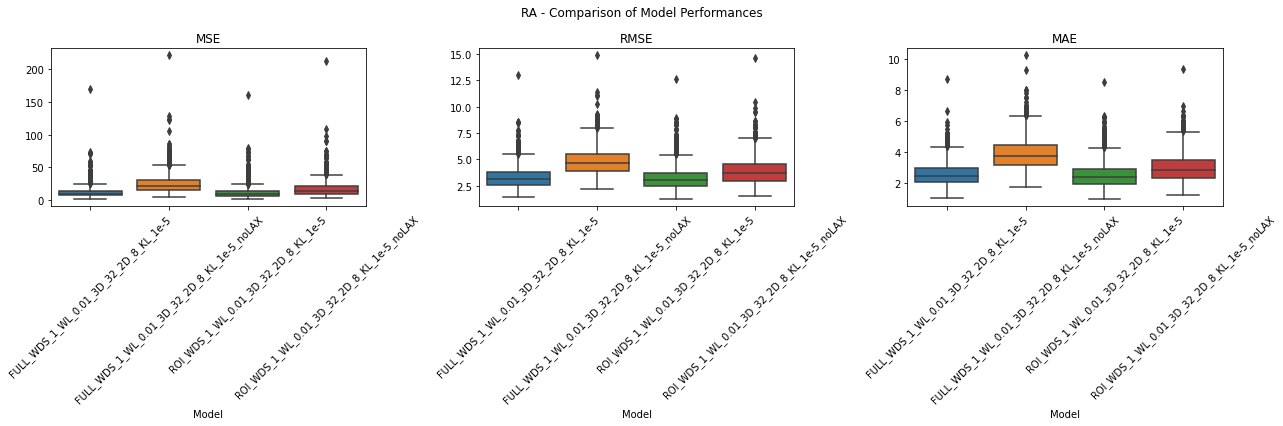

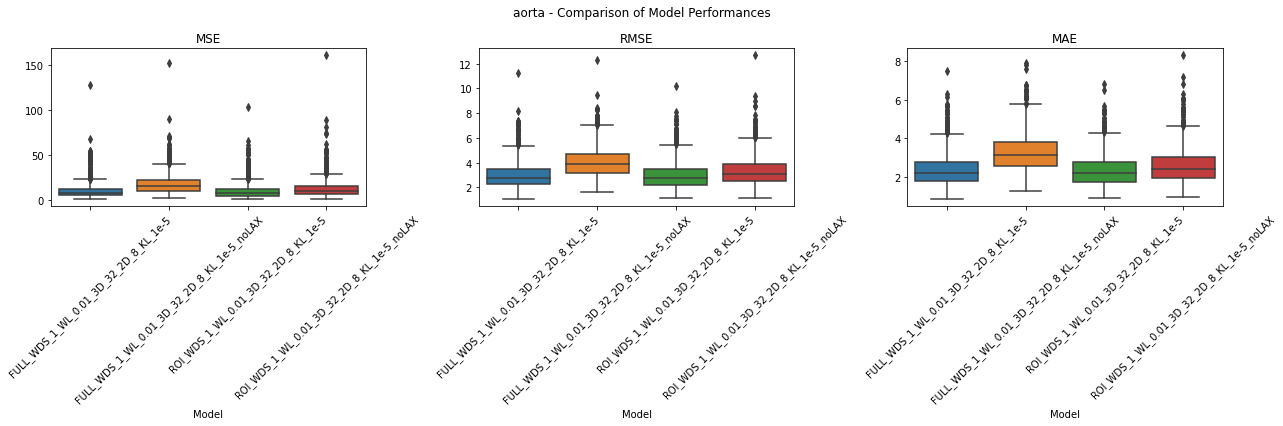

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")
    try:
        assert os.path.exists(eval_file)
    except AssertionError:
        print(f"Missing evaluation results for {model_name}")
        continue
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [2]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,2.26 (0.55),3.41 (0.65),2.18 (0.54),2.43 (0.59)
MSE,9.29 (5.48),19.40 (8.15),8.80 (5.31),11.27 (6.69)
RMSE,2.95 (0.76),4.32 (0.84),2.87 (0.76),3.25 (0.86)


LV


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,1.79 (0.55),2.99 (0.59),1.70 (0.54),1.75 (0.54)
MSE,5.60 (4.03),14.34 (5.82),5.11 (3.67),5.35 (3.83)
RMSE,2.26 (0.71),3.72 (0.72),2.15 (0.70),2.21 (0.70)


RV


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,2.08 (0.60),3.21 (0.71),1.97 (0.59),2.00 (0.58)
MSE,7.69 (4.93),16.60 (7.57),7.04 (4.72),7.12 (4.84)
RMSE,2.66 (0.78),3.98 (0.86),2.54 (0.78),2.56 (0.76)


LA


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,2.37 (0.78),3.64 (1.04),2.30 (0.77),2.84 (0.99)
MSE,10.07 (9.74),22.13 (15.44),9.58 (9.24),14.88 (13.29)
RMSE,3.00 (1.02),4.52 (1.31),2.92 (1.02),3.63 (1.31)


RA


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,2.57 (0.76),3.88 (1.03),2.51 (0.80),2.98 (0.93)
MSE,12.00 (9.42),25.08 (15.17),11.75 (10.16),16.67 (13.13)
RMSE,3.30 (1.05),4.84 (1.30),3.24 (1.11),3.87 (1.30)


aorta


,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX
MAE,2.37 (0.84),3.26 (1.00),2.34 (0.83),2.56 (0.89)
MSE,10.24 (8.71),17.81 (11.67),10.04 (8.43),12.38 (10.52)
RMSE,3.01 (1.09),4.04 (1.22),2.97 (1.09),3.31 (1.20)


/tmp/ipykernel_432218/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)
/tmp/ipykernel_432218/3849485326.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(results, ignore_index=True)


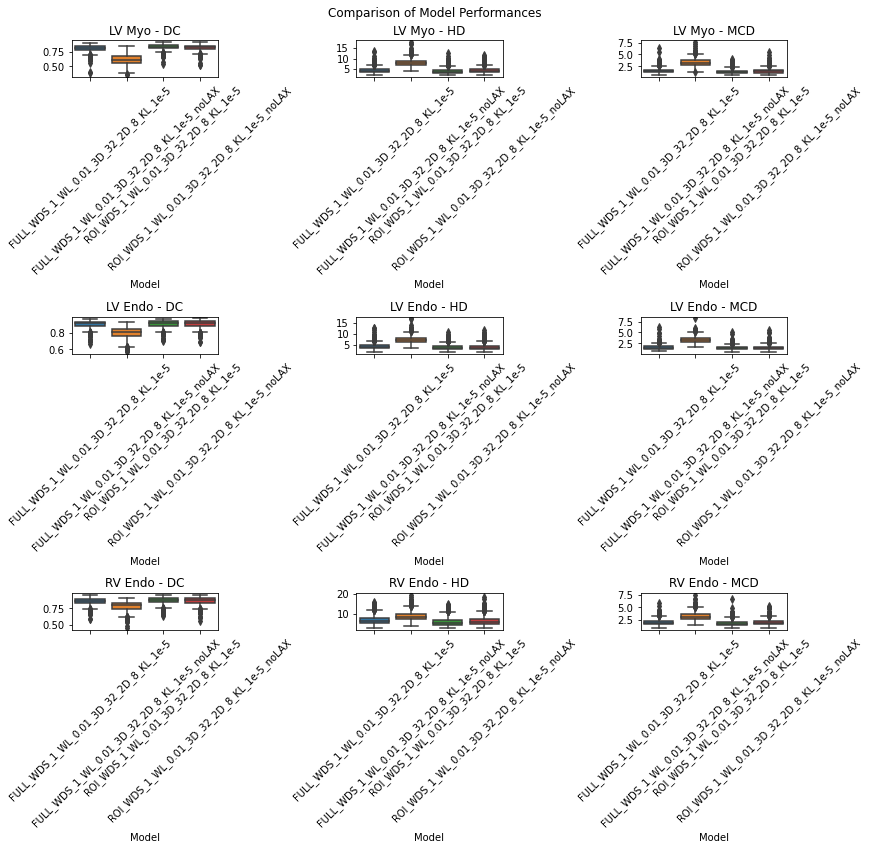

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [4]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "4.74 (1.75)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,FULL_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5,ROI_WDS_1_WL_0.01_3D_32_2D_8_KL_1e-5_noLAX,MCSI-Net-Paper
LV Endo - DC,0.90 (0.04),0.80 (0.06),0.91 (0.04),0.90 (0.04),0.88 (0.05)
LV Endo - HD,4.22 (1.22),7.48 (1.54),3.89 (1.18),4.08 (1.22),7.06 (2.64)
LV Endo - MCD,1.55 (0.51),3.24 (0.71),1.39 (0.46),1.49 (0.49),1.86 (0.79)
LV Myo - DC,0.81 (0.05),0.61 (0.09),0.84 (0.04),0.83 (0.05),0.78 (0.08)
LV Myo - HD,4.40 (1.26),7.91 (1.60),3.96 (1.23),4.23 (1.27),4.75 (1.76)
LV Myo - MCD,1.57 (0.52),3.28 (0.74),1.35 (0.46),1.49 (0.51),1.86 (0.82)
RV Endo - DC,0.86 (0.05),0.78 (0.07),0.87 (0.05),0.86 (0.05),0.85 (0.06)
RV Endo - HD,6.79 (2.23),8.76 (2.24),6.13 (2.23),6.44 (2.19),7.06 (2.64)
RV Endo - MCD,1.99 (0.59),3.10 (0.77),1.76 (0.59),1.90 (0.57),2.27 (0.95)
